# Adversarial Attack Examples

In [1]:
import foolbox
from foolbox.criteria import TargetClass
import keras
import numpy as np
from keras.applications.resnet50 import ResNet50
from sklearn.preprocessing import OneHotEncoder

# instantiate model
keras.backend.set_learning_phase(0)
kmodel = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = foolbox.models.KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

# get source image and label
image, label = foolbox.utils.imagenet_example()

# apply attack on source image
# ::-1 reverses the color channels, because Keras ResNet50 expects BGR instead of RGB
attack = foolbox.attacks.FGSM(fmodel)
#attack = foolbox.attacks.SinglePixelAttack(fmodel)
adversarial = attack(image[:, :, ::-1], label)
#attack=foolbox.attacks.RandomPGD(fmodel,TargetClass(1))
#adversarial=attack(image[:, :, ::-1], label,unpack=False)
# if the attack fails, adversarial will be None and a warning will be printed

C:\Users\hedho\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\hedho\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hedho\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])

In [2]:
print('predicted class', np.argmax(fmodel.predictions(image[:, :, ::-1])))
print('adversarial class', np.argmax(fmodel.predictions(adversarial)))

predicted class 282
adversarial class 281


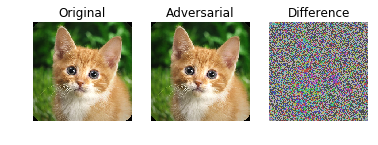

In [3]:
# if you use Jupyter notebooks
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure()

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image / 255)  # division by 255 to convert [0, 255] to [0, 1]
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adversarial')
plt.imshow(adversarial[:, :, ::-1] / 255)  # ::-1 to convert BGR to RGB
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Difference')
difference = adversarial[:, :, ::-1] - image
plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
plt.axis('off')

plt.show()

# Import Dependencies

In [4]:
import os
from PIL import Image
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

# Load Image

In [5]:
# Train 0 7-11
x_train0 = np.empty((1,224,224,3),dtype="float32")

imgs = os.listdir(r"C:\Users\hedho\Desktop\專案研究資料\演算法風險\7-11")
num = len(imgs)
for i in range(num):
    img_path = r"C:\Users\hedho\Desktop\專案研究資料\演算法風險\7-11\\"+imgs[i]
    img = image.load_img(img_path, target_size=(224, 224))
    arr = np.asarray(img,dtype="float32")
    arr = image.img_to_array(img)
        
    x_train0[i,:,:,:] = arr

In [6]:
# Train 1 FamilyMart
x_train1 = np.empty((1,224,224,3),dtype="float32")

imgs = os.listdir(r"C:\Users\hedho\Desktop\專案研究資料\演算法風險\FamilyMart")
num = len(imgs)
for i in range(num):
    img_path = r"C:\Users\hedho\Desktop\專案研究資料\演算法風險\FamilyMart\\"+imgs[i]
    img = image.load_img(img_path, target_size=(224, 224))
    arr = np.asarray(img,dtype="float32")
    arr = image.img_to_array(img)
        
    x_train1[i,:,:,:] = arr

In [7]:
# Train 2 McDonalds
x_train2 = np.empty((1,224,224,3),dtype="float32")

imgs = os.listdir(r"C:\Users\hedho\Desktop\專案研究資料\演算法風險\McDonalds")
num = len(imgs)
for i in range(num):
    img_path = r"C:\Users\hedho\Desktop\專案研究資料\演算法風險\McDonalds\\"+imgs[i]
    img = image.load_img(img_path, target_size=(224, 224))
    arr = np.asarray(img,dtype="float32")
    arr = image.img_to_array(img)
        
    x_train2[i,:,:,:] = arr

In [8]:
# Train 3 Pepsi
x_train3 = np.empty((1,224,224,3),dtype="float32")

imgs = os.listdir(r"C:\Users\hedho\Desktop\專案研究資料\演算法風險\Pepsi")
num = len(imgs)
for i in range(num):
    img_path = r"C:\Users\hedho\Desktop\專案研究資料\演算法風險\Pepsi\\"+imgs[i]
    img = image.load_img(img_path, target_size=(224, 224))
    arr = np.asarray(img,dtype="float32")
    arr = image.img_to_array(img)
        
    x_train3[i,:,:,:] = arr

In [9]:
# Train 4 Starbucks
x_train4 = np.empty((1,224,224,3),dtype="float32")

imgs = os.listdir(r"C:\Users\hedho\Desktop\專案研究資料\演算法風險\Starbucks")
num = len(imgs)
for i in range(num):
    img_path = r"C:\Users\hedho\Desktop\專案研究資料\演算法風險\Starbucks\\"+imgs[i]
    img = image.load_img(img_path, target_size=(224, 224))
    arr = np.asarray(img,dtype="float32")
    arr = image.img_to_array(img)
        
    x_train4[i,:,:,:] = arr

In [10]:
# Train 5 Uni-President
x_train5 = np.empty((1,224,224,3),dtype="float32")

imgs = os.listdir(r"C:\Users\hedho\Desktop\專案研究資料\演算法風險\Uni-President")
num = len(imgs)
for i in range(num):
    img_path = r"C:\Users\hedho\Desktop\專案研究資料\演算法風險\Uni-President\\"+imgs[i]
    img = image.load_img(img_path, target_size=(224, 224))
    arr = np.asarray(img,dtype="float32")
    arr = image.img_to_array(img)
        
    x_train5[i,:,:,:] = arr

In [11]:
# Train 6 Lego
x_train6 = np.empty((1,224,224,3),dtype="float32")

imgs = os.listdir(r"C:\Users\hedho\Desktop\專案研究資料\演算法風險\Lego")
num = len(imgs)
for i in range(num):
    img_path = r"C:\Users\hedho\Desktop\專案研究資料\演算法風險\Lego\\"+imgs[i]
    img = image.load_img(img_path, target_size=(224, 224))
    arr = np.asarray(img,dtype="float32")
    arr = image.img_to_array(img)
        
    x_train6[i,:,:,:] = arr

In [12]:
x_train = np.append(x_train0,x_train1,axis=0)
x_train = np.append(x_train,x_train2,axis=0)
x_train = np.append(x_train,x_train3,axis=0)
x_train = np.append(x_train,x_train4,axis=0)
x_train = np.append(x_train,x_train5,axis=0)
x_train = np.append(x_train,x_train6,axis=0)

In [13]:
x_train.shape

(7, 224, 224, 3)

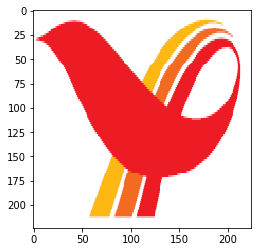

In [14]:
plt.imshow(x_train[5] / 255)

# Transfer Learning

In [15]:
X = x_train

In [16]:
y = np.append(np.zeros(1),np.ones(1))
y = np.append(y,np.full((1, 1), 2))
y = np.append(y,np.full((1, 1), 3))
y = np.append(y,np.full((1, 1), 4))
y = np.append(y,np.full((1, 1), 5))
y = np.append(y,np.full((1, 1), 6))

In [17]:
y

array([0., 1., 2., 3., 4., 5., 6.])

In [18]:
oh = OneHotEncoder(sparse = False)
y = oh.fit_transform(y.reshape(-1,1))

### InceptionV3

In [19]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(7, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit(X,y,epochs=10,batch_size=None)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
#from keras.optimizers import SGD
#model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')
model.compile(optimizer='adam', loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(X,y,epochs=30,batch_size=None)

Epoch 1/10
7/7 [==============================] - 2s 345ms/step - loss: 12.4514
Epoch 2/10
7/7 [==============================] - 1s 76ms/step - loss: 13.8155
Epoch 3/10
7/7 [==============================] - 1s 92ms/step - loss: 13.8155
Epoch 4/10
7/7 [==============================] - 1s 93ms/step - loss: 13.8155
Epoch 5/10
7/7 [==============================] - 1s 82ms/step - loss: 13.8155
Epoch 6/10
7/7 [==============================] - 1s 86ms/step - loss: 13.8155
Epoch 7/10
7/7 [==============================] - 1s 84ms/step - loss: 13.8155
Epoch 8/10
7/7 [==============================] - 1s 84ms/step - loss: 13.8155
Epoch 9/10
7/7 [==============================] - 1s 86ms/step - loss: 13.8155
Epoch 10/10
7/7 [==============================] - 1s 83ms/step - loss: 13.8155
0 input_2
1 conv2d_1
2 batch_normalization_1
3 activation_50
4 conv2d_2
5 batch_normalization_2
6 activation_51
7 conv2d_3
8 batch_normalization_3
9 activation_52
10 max_pooling2d_2
11 conv2d_4
12 batch_norma

Epoch 20/30
7/7 [==============================] - 1s 139ms/step - loss: 0.2721
Epoch 21/30
7/7 [==============================] - 1s 139ms/step - loss: 0.1700
Epoch 22/30
7/7 [==============================] - 1s 140ms/step - loss: 0.1212
Epoch 23/30
7/7 [==============================] - 1s 138ms/step - loss: 0.1155
Epoch 24/30
7/7 [==============================] - 1s 134ms/step - loss: 0.0596
Epoch 25/30
7/7 [==============================] - 1s 139ms/step - loss: 0.0471
Epoch 26/30
7/7 [==============================] - 1s 139ms/step - loss: 0.0377
Epoch 27/30
7/7 [==============================] - 1s 131ms/step - loss: 0.0271
Epoch 28/30
7/7 [==============================] - 1s 132ms/step - loss: 0.0172
Epoch 29/30
7/7 [==============================] - 1s 130ms/step - loss: 0.0124
Epoch 30/30
7/7 [==============================] - 1s 129ms/step - loss: 0.0093


In [20]:
y_prob = model.predict(X) 
y_classes = y_prob.argmax(axis=-1)

In [21]:
print('F1 Score: ',f1_score(np.argmax(y, axis = 1), y_classes, average='weighted'))

F1 Score:  1.0


In [22]:
print('Accuracy Score: ',accuracy_score(np.argmax(y, axis = 1), y_classes))

Accuracy Score:  1.0


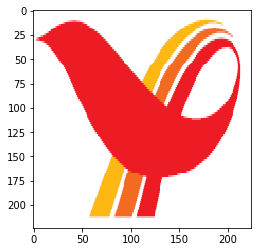

In [23]:
plt.imshow(X[5] / 255)

In [24]:
import pandas as pd
pd.DataFrame({'y':np.argmax(y, axis = 1), 'y_classes':y_classes})

,y,y_classes
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6


# White Box Non-Target Adversarial Attack

In [25]:
import foolbox
from foolbox.criteria import TargetClass
from foolbox.criteria import TargetClassProbability
import keras
import numpy as np

In [26]:
image, label = (x_train[4], y[4])
Bounds = (image.min(), image.max())

In [27]:
#target_class = 0
#criterion = TargetClass(target_class)
#criterion = TargetClassProbability(target_class, p=0.77)

In [28]:
# instantiate model
keras.backend.set_learning_phase(0)

fmodel = foolbox.models.KerasModel(model, bounds=Bounds)

# apply attack on source image
# ::-1 reverses the color channels, because Keras ResNet50 expects BGR instead of RGB
attack = foolbox.attacks.FGSM(fmodel)#,criterion) # Target or Non-Target
#attack = foolbox.attacks.SinglePixelAttack(fmodel)
#attack = foolbox.attacks.LBFGSAttack(fmodel)
#attack = foolbox.attacks.LocalSearchAttack(fmodel)
#attack = foolbox.attacks.CarliniWagnerL2Attack(fmodel)
#attack = foolbox.attacks.BoundaryAttack(fmodel)

adversarial = attack(image, np.argmax(label, axis = 0))
# if the attack fails, adversarial will be None and a warning will be printed

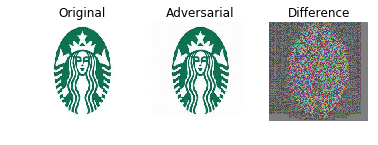

In [29]:
# if you use Jupyter notebooks
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure()

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image / 255)  # division by 255 to convert [0, 255] to [0, 1]
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adversarial')
plt.imshow(adversarial / 255)  # ::-1 to convert BGR to RGB
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Difference')
difference = adversarial - image
plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
plt.axis('off')

plt.show()

In [30]:
y_prob_a = model.predict(adversarial.reshape(1, 224, 224, 3))
y_classes_a = y_prob_a.argmax(axis=-1)
print('predicted class', np.argmax(label,axis=0))
print('adversarial class', y_classes_a[0])

predicted class 4
adversarial class 6


### Adversarial Distillation

In [31]:
X.shape, model.predict(X).shape

((7, 224, 224, 3), (7, 7))

In [32]:
_X_ = X / 255

In [33]:
FX = model.predict(X)

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Reshape, Dense

In [35]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(16, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(8, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(4, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 7, activation = 'softmax'))
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 109, 109, 16)      4624      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 52, 52, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 24, 24, 4)         292       
__________

In [36]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy')
classifier.fit(_X_,FX,epochs=30,batch_size=1)

Epoch 1/30
7/7 [==============================] - 2s 294ms/step - loss: 1.9837
Epoch 2/30
7/7 [==============================] - 0s 54ms/step - loss: 1.9043
Epoch 3/30
7/7 [==============================] - 0s 55ms/step - loss: 1.7489
Epoch 4/30
7/7 [==============================] - 0s 55ms/step - loss: 1.3797
Epoch 5/30
7/7 [==============================] - 0s 55ms/step - loss: 0.7817
Epoch 6/30
7/7 [==============================] - 0s 55ms/step - loss: 0.4609
Epoch 7/30
7/7 [==============================] - 0s 55ms/step - loss: 0.1395
Epoch 8/30
7/7 [==============================] - 0s 60ms/step - loss: 0.8139
Epoch 9/30
7/7 [==============================] - 0s 56ms/step - loss: 0.2012
Epoch 10/30
7/7 [==============================] - 0s 55ms/step - loss: 0.1406
Epoch 11/30
7/7 [==============================] - 0s 56ms/step - loss: 0.0831
Epoch 12/30
7/7 [==============================] - 0s 57ms/step - loss: 0.0515
Epoch 13/30
7/7 [==============================] - 0s 55ms/s

In [37]:
adversarial = adversarial.reshape(1,224,224,3)

In [38]:
y_prob_a = classifier.predict(adversarial / 255)
y_classes_a = y_prob_a.argmax(axis=-1)
print('predicted class', np.argmax(label,axis=0))
print('adversarial class', y_classes_a[0])

predicted class 4
adversarial class 4


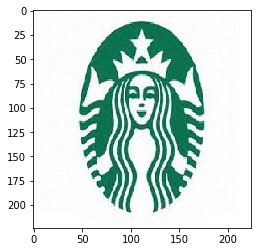

In [39]:
plt.imshow(adversarial.reshape(224,224,3) / 255)

# Black Box Non-Target Transfer Attack

### SimpleModel

In [40]:
Simple_Model = Sequential()
Simple_Model.add(Conv2D(256, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
Simple_Model.add(MaxPooling2D(pool_size = (2, 2)))
Simple_Model.add(Conv2D(128, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
Simple_Model.add(MaxPooling2D(pool_size = (2, 2)))
Simple_Model.add(Conv2D(64, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
Simple_Model.add(MaxPooling2D(pool_size = (2, 2)))
Simple_Model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
Simple_Model.add(MaxPooling2D(pool_size = (2, 2)))
Simple_Model.add(Conv2D(16, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
Simple_Model.add(MaxPooling2D(pool_size = (2, 2)))
Simple_Model.add(Flatten())
Simple_Model.add(Dense(units = 256, activation = 'relu'))
Simple_Model.add(Dense(units = 7, activation = 'softmax'))
Simple_Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 222, 222, 256)     7168      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 256)     0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 109, 109, 128)     295040    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 52, 52, 64)        73792     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 24, 24, 32)        18464     
__________

In [41]:
Simple_Model.compile(optimizer='adam', loss='categorical_crossentropy')
Simple_Model.fit(_X_,y,epochs=30,batch_size=1)

Epoch 1/30
7/7 [==============================] - 6s 815ms/step - loss: 2.1549
Epoch 2/30
7/7 [==============================] - 4s 602ms/step - loss: 2.0383
Epoch 3/30
7/7 [==============================] - 4s 591ms/step - loss: 1.9400
Epoch 4/30
7/7 [==============================] - 4s 589ms/step - loss: 1.9524
Epoch 5/30
7/7 [==============================] - 4s 587ms/step - loss: 1.9555
Epoch 6/30
7/7 [==============================] - 4s 582ms/step - loss: 1.9464
Epoch 7/30
7/7 [==============================] - 4s 568ms/step - loss: 1.9453
Epoch 8/30
7/7 [==============================] - 4s 580ms/step - loss: 1.9315
Epoch 9/30
7/7 [==============================] - 4s 583ms/step - loss: 1.8586
Epoch 10/30
7/7 [==============================] - 4s 575ms/step - loss: 1.6957
Epoch 11/30
7/7 [==============================] - 4s 574ms/step - loss: 1.4241
Epoch 12/30
7/7 [==============================] - 4s 569ms/step - loss: 0.7851
Epoch 13/30
7/7 [==============================] 

In [42]:
y_prob_a = Simple_Model.predict(adversarial / 255)
y_classes_a = y_prob_a.argmax(axis=-1)
print('predicted class', np.argmax(label,axis=0))
print('adversarial class', y_classes_a[0])

predicted class 4
adversarial class 1


### ModelWrapper

In [43]:
from foolbox.models import ModelWrapper
New_Model = ModelWrapper(fmodel)

In [44]:
y_prob_a = New_Model.predictions(adversarial.reshape(224, 224, 3))
y_classes_a = y_prob_a.argmax(axis=-1)
print('predicted class', np.argmax(label,axis=0))
print('adversarial class', y_classes_a)

predicted class 4
adversarial class 6


### CompositeModel

In [45]:
bmodel = foolbox.models.KerasModel(classifier, bounds=Bounds)

In [46]:
forward_model = bmodel
backward_model = fmodel

from foolbox.models import CompositeModel
Composite_Model = CompositeModel(forward_model, backward_model)

In [47]:
y_prob_a = Composite_Model.predictions(adversarial.reshape(224, 224, 3))
y_classes_a = y_prob_a.argmax(axis=-1)
print('predicted class', np.argmax(label,axis=0))
print('adversarial class', y_classes_a)

predicted class 4
adversarial class 4


### InceptionResNetV2

In [48]:
X_ = X
y_ = y

In [49]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# create the base pre-trained model
base_model = InceptionResNetV2(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 2 classes
predictions = Dense(7, activation='softmax')(x)

# this is the model we will train
model_v2 = Model(inputs=base_model.input, outputs=predictions)
model_v2.summary()

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model_v2.layers[:600]:
   layer.trainable = False
for layer in model_v2.layers[600:]:
   layer.trainable = True

# we need to recompile the model_v2 for these modifications to take effect
# we use SGD with a low learning rate
#from keras.optimizers import SGD
#model_v2.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')
model_v2.compile(optimizer='adam', loss='categorical_crossentropy')

# we train our model_v2 again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model_v2.fit(X,y,epochs=30,batch_size=None)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_104 (Conv2D)             (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, None, None, 3 96          conv2d_104[0][0]                 
__________________________________________________________________________________________________
activation_144 (Activation)     (None, None, None, 3 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_105

__________________________________________________________________________________________________
batch_normalization_245 (BatchN (None, None, None, 1 480         conv2d_254[0][0]                 
__________________________________________________________________________________________________
activation_294 (Activation)     (None, None, None, 1 0           batch_normalization_245[0][0]    
__________________________________________________________________________________________________
conv2d_252 (Conv2D)             (None, None, None, 1 208896      block17_18_ac[0][0]              
__________________________________________________________________________________________________
conv2d_255 (Conv2D)             (None, None, None, 1 215040      activation_294[0][0]             
__________________________________________________________________________________________________
batch_normalization_243 (BatchN (None, None, None, 1 576         conv2d_252[0][0]                 
__________

Epoch 1/30
7/7 [==============================] - 15s 2s/step - loss: 13.8155
Epoch 2/30
7/7 [==============================] - 3s 374ms/step - loss: 7.5846
Epoch 3/30
7/7 [==============================] - 2s 351ms/step - loss: 4.0084
Epoch 4/30
7/7 [==============================] - 2s 354ms/step - loss: 2.8961
Epoch 5/30
7/7 [==============================] - 2s 349ms/step - loss: 2.8911
Epoch 6/30
7/7 [==============================] - 2s 350ms/step - loss: 2.3226
Epoch 7/30
7/7 [==============================] - 2s 356ms/step - loss: 1.9555
Epoch 8/30
7/7 [==============================] - 3s 361ms/step - loss: 1.6672
Epoch 9/30
7/7 [==============================] - 3s 385ms/step - loss: 1.0837
Epoch 10/30
7/7 [==============================] - 2s 355ms/step - loss: 1.0283
Epoch 11/30
7/7 [==============================] - 3s 378ms/step - loss: 0.9650
Epoch 12/30
7/7 [==============================] - 3s 367ms/step - loss: 0.7197
Epoch 13/30
7/7 [==============================] -

In [50]:
image, label = (X_[5], y[5])
Bounds = (image.min(), image.max())
image_ = image
#image_ = preprocess_input(image_)
adversarial_ = adversarial
#adversarial_ = preprocess_input(adversarial)

In [51]:
y_prob_a = model_v2.predict(adversarial_)
y_classes_a = y_prob_a.argmax(axis=-1)
print('predicted class', np.argmax(label,axis=0))
print('adversarial class', y_classes_a[0])

predicted class 5
adversarial class 4


In [52]:
keras.backend.set_learning_phase(0)

smodel = foolbox.models.KerasModel(model_v2, bounds=Bounds)

attack = foolbox.attacks.FGSM(smodel)#,criterion) # Target or Non-Target
#attack = foolbox.attacks.LBFGSAttack(fmodel) # White-Box or Black-Box
#attack = foolbox.attacks.LocalSearchAttack(fmodel)
#attack = foolbox.attacks.CarliniWagnerL2Attack(fmodel)

adversarial_s = attack(image_, np.argmax(label, axis = 0))

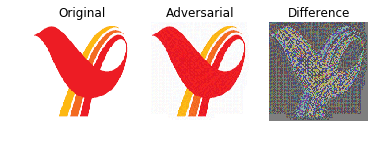

In [53]:
# if you use Jupyter notebooks
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure()

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image_ / 255)  # division by 255 to convert [0, 255] to [0, 1]
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adversarial')
plt.imshow(adversarial_s / 255)  # ::-1 to convert BGR to RGB
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Difference')
difference = adversarial_s - image_
plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
plt.axis('off')

plt.show()

In [54]:
y_prob_a = model_v2.predict(adversarial_s.reshape(1, 224, 224, 3) / 255)
y_classes_a = y_prob_a.argmax(axis=-1)
print('predicted class', np.argmax(label,axis=0))
print('adversarial class', y_classes_a[0])

predicted class 5
adversarial class 2
